In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
cars = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Saudi%20Arabia%20Used%20Cars%20Dataset/UsedCarsSA_Clean_EN.csv")
print('Shape:', cars.shape)

Shape: (8035, 13)


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [4]:
cars.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000,False
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0,True
8,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000,False
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000,False


In [5]:
print("Number of duplicate rows: ", sum(cars.duplicated()))

Number of duplicate rows:  3


In [6]:
cars.drop_duplicates(inplace=True)
print("Number of duplicate rows:", sum(cars.duplicated()))

Number of duplicate rows: 0


In [7]:
cars.isnull().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [8]:
cars = cars.rename(columns={"Type": "Model"})
cars.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


In [9]:
cars = cars.drop(["Negotiable"], axis=1)
cars.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500


In [10]:
cars.describe()

,Year,Engine_Size,Mileage,Price
count,8032.000000,8032.000000,8.032000e+03,8.032000e+03
mean,2014.097112,3.287774,1.491528e+05,5.369923e+04
std,5.758021,1.518001,3.475122e+05,7.199385e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.017855e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.362500e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


In [11]:
cars.describe(exclude="number")

,Make,Model,Origin,Color,Options,Fuel_Type,Gear_Type,Region
count,8032,8032,8032,8032,8032,8032,8032,8032
unique,59,381,4,15,3,3,2,27
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh
freq,2037,372,5961,3477,3191,7858,6968,3236


In [12]:
cars[cars.Price == 0]

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0
18,GMC,Yukon,2018,Saudi,White,Full,5.3,Gas,Automatic,37000,Riyadh,0
26,Toyota,Camry,2019,Saudi,Red,Full,2.5,Gas,Automatic,8000,Makkah,0
28,Toyota,Avalon,2008,Other,Red,Full,3.5,Gas,Automatic,169000,Riyadh,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0


In [13]:
cars = cars[cars['Price'] != 0]
cars.head(10)

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000
8,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000
10,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000
11,Nissan,Patrol,2014,Saudi,White,Full,5.6,Gas,Automatic,106000,Dammam,135000


In [14]:
cars.sort_values(by="Price", ascending=1, inplace=True)
cars.head(10)

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
8023,GMC,Yukon,2019,Saudi,Grey,Full,5.3,Gas,Automatic,50000,Jubail,1
6999,Genesis,G80,2018,Other,Grey,Semi Full,3.8,Gas,Automatic,170000,Riyadh,500
7625,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,100000,Riyadh,850
2178,Mitsubishi,Attrage,2019,Saudi,Grey,Standard,1.2,Gas,Automatic,41000,Jeddah,877
3642,Kia,Rio,2019,Saudi,Bronze,Standard,1.4,Gas,Automatic,55500,Arar,884
7233,Toyota,Yaris,2019,Saudi,White,Standard,1.6,Gas,Automatic,85000,Najran,950
1661,MG,5,2020,Saudi,White,Standard,1.5,Gas,Automatic,41000,Al-Ahsa,988
7665,Hyundai,Elantra,2019,Saudi,Grey,Standard,2.0,Gas,Automatic,89000,Jeddah,993
3009,GMC,Yukon,2021,Saudi,Another Color,Standard,5.3,Gas,Automatic,4000,Jeddah,1000
4277,Toyota,Corolla,2020,Saudi,Silver,Standard,1.6,Gas,Automatic,48563,Hail,1002


In [15]:
cars = cars[cars["Price"] > 5000]
cars.head(10)

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
7624,Mercedes,SEL,1986,Saudi,Silver,Full,3.0,Gas,Automatic,500000,Tabouk,5500
5565,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500
1208,Kia,Optima,2006,Other,White,Standard,1.3,Gas,Manual,290000,Taef,6000
5038,Mercury,Grand Marquis,2001,Other,Blue,Semi Full,4.6,Gas,Automatic,33000,Riyadh,6000
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000
5850,Škoda,Fabia,2007,Saudi,Red,Standard,1.2,Gas,Manual,219000,Riyadh,6000
4724,Toyota,Cressida,1996,Saudi,White,Semi Full,1.5,Gas,Manual,100000,Al-Medina,6500
6303,Chevrolet,Suburban,1999,Saudi,Green,Standard,5.3,Gas,Automatic,2500,Hail,6500
2809,Honda,Other,2011,Saudi,Black,Standard,1.0,Gas,Manual,4200,Jeddah,6500
6928,Suzuki,D'max,2001,Other,White,Full,1.0,Diesel,Manual,1000,Jeddah,7000


In [16]:
cars = cars[cars["Mileage"] < 700000]
cars.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
7624,Mercedes,SEL,1986,Saudi,Silver,Full,3.0,Gas,Automatic,500000,Tabouk,5500
5565,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500
1208,Kia,Optima,2006,Other,White,Standard,1.3,Gas,Manual,290000,Taef,6000
5038,Mercury,Grand Marquis,2001,Other,Blue,Semi Full,4.6,Gas,Automatic,33000,Riyadh,6000
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000


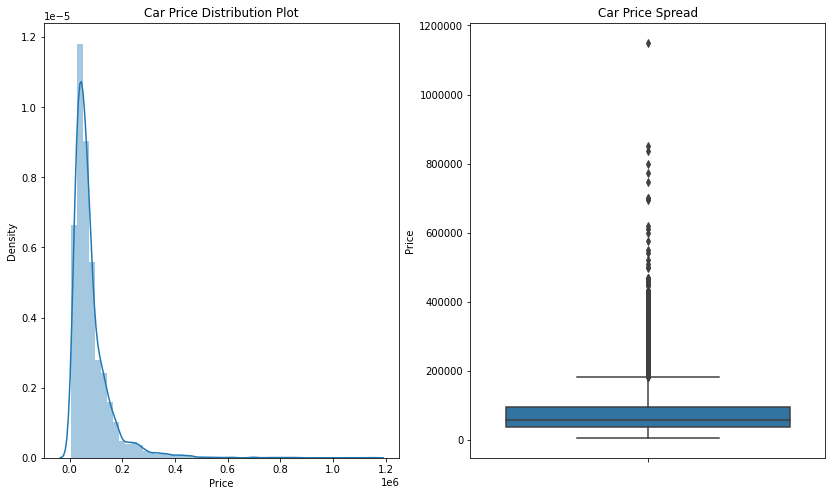

In [18]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title("Car Price Distribution Plot")
sns.distplot(cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

In [20]:
print(cars.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.376000e+03
mean     8.001565e+04
std      7.508601e+04
min      5.500000e+03
25%      3.650000e+04
50%      5.900000e+04
75%      9.500000e+04
85%      1.300000e+05
90%      1.550000e+05
100%     1.150000e+06
max      1.150000e+06
Name: Price, dtype: float64


In [21]:
categorical_columns = cars.select_dtypes(include=['object'])
categorical_columns.head()

,Make,Model,Origin,Color,Options,Fuel_Type,Gear_Type,Region
7624,Mercedes,SEL,Saudi,Silver,Full,Gas,Automatic,Tabouk
5565,Other,Other,Other,Yellow,Semi Full,Gas,Manual,Jeddah
1208,Kia,Optima,Other,White,Standard,Gas,Manual,Taef
5038,Mercury,Grand Marquis,Other,Blue,Semi Full,Gas,Automatic,Riyadh
2063,Ford,Marquis,Saudi,White,Standard,Gas,Automatic,Aseer


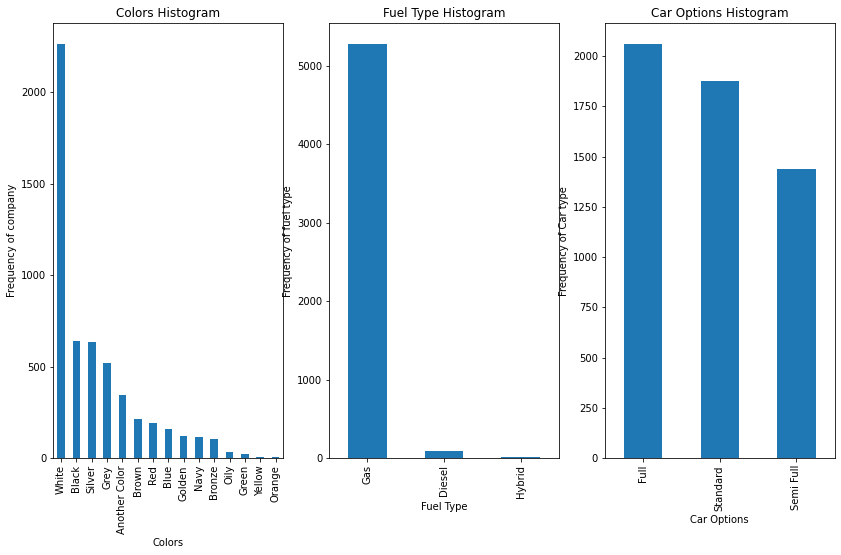

In [22]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
plt1 = cars.Color.value_counts().plot(kind='bar')
plt.title('Colors Histogram')
plt1.set(xlabel = 'Colors', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.Fuel_Type.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.Options.value_counts().plot(kind='bar')
plt.title('Car Options Histogram')
plt1.set(xlabel = 'Car Options', ylabel='Frequency of Car type')

plt.show()

Text(0, 0.5, 'Count of Cars')

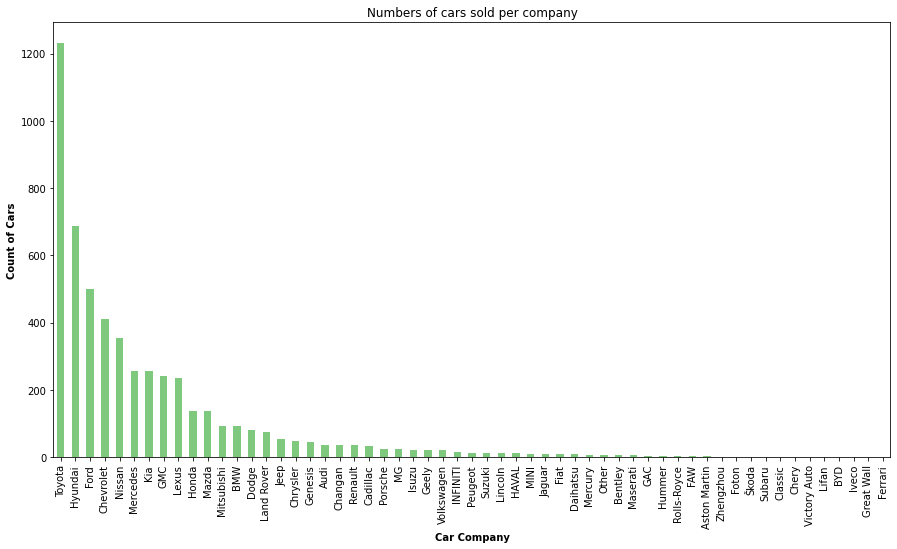

In [23]:
plt.rcParams['figure.figsize'] = [15,8]
ax = cars['Make'].value_counts().plot(kind='bar', colormap = 'Accent')
ax.title.set_text('Numbers of cars sold per company')
plt.xlabel("Car Company",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

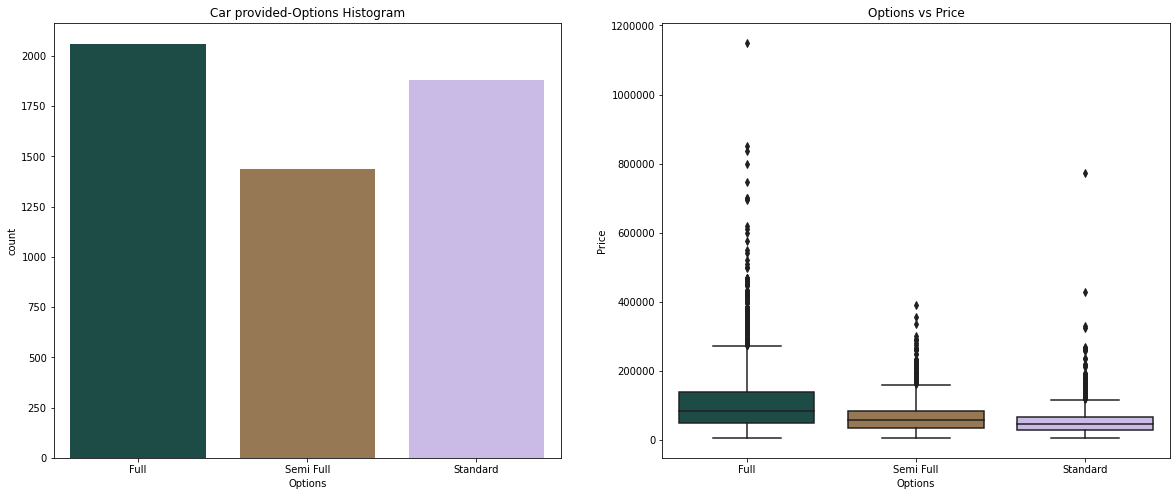

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car provided-Options Histogram')
sns.countplot(cars.Options, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Options vs Price')
sns.boxplot(x=cars.Options, y=cars.Price, palette=("cubehelix"))

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

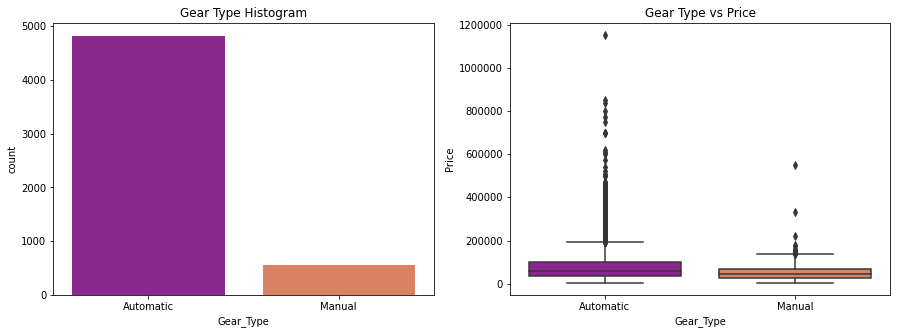

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gear Type Histogram')
sns.countplot(cars.Gear_Type, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Gear Type vs Price')
sns.boxplot(x=cars.Gear_Type, y=cars.Price, palette=("plasma"))

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

<Figure size 1440x576 with 0 Axes>

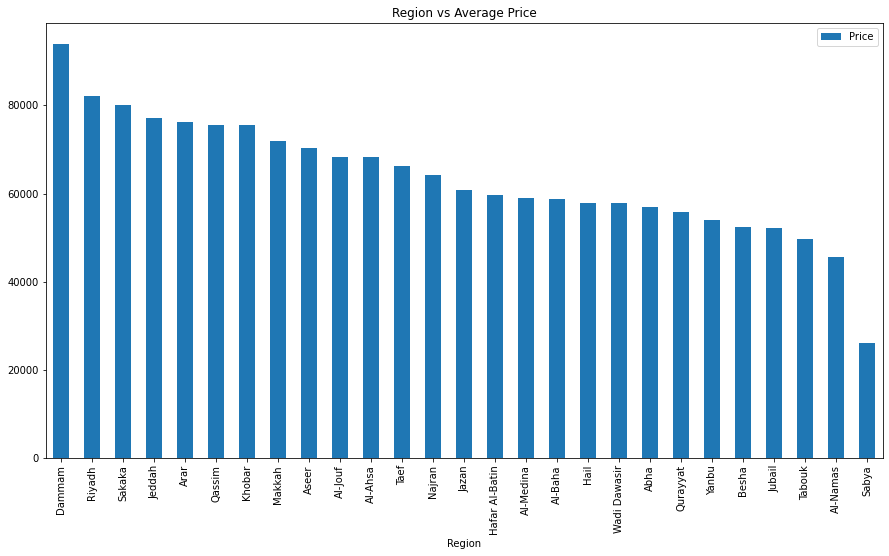

In [26]:
plt.figure(figsize=(20,8))

df = pd.DataFrame(cars.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Region vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

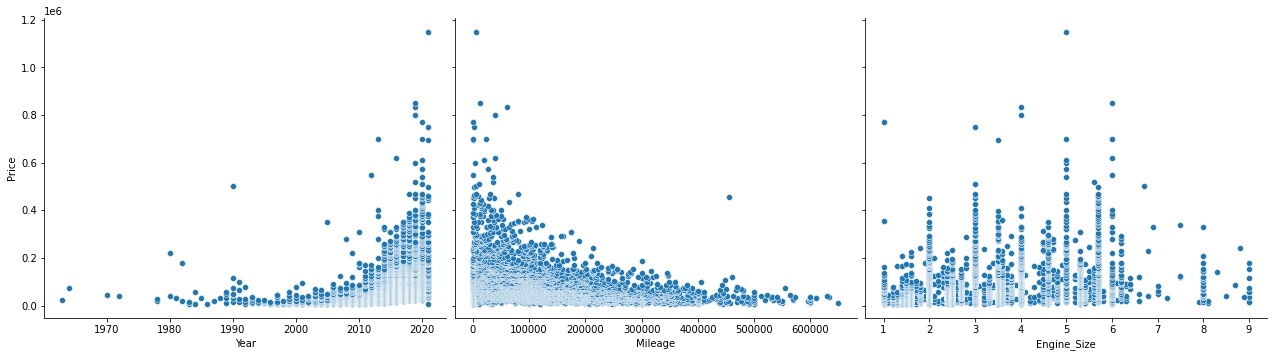

In [27]:
plt.figure(figsize=(25, 6))
sns.pairplot(cars, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',size=5, aspect=1.2, kind='scatter')
plt.show()

<Figure size 1440x432 with 0 Axes>

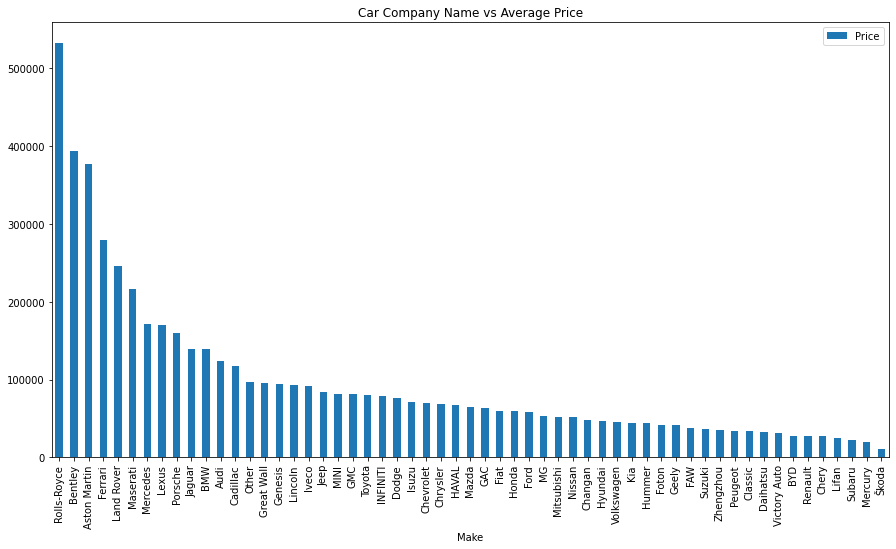

In [28]:
plt.figure(figsize=(20, 6))

df = pd.DataFrame(cars.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

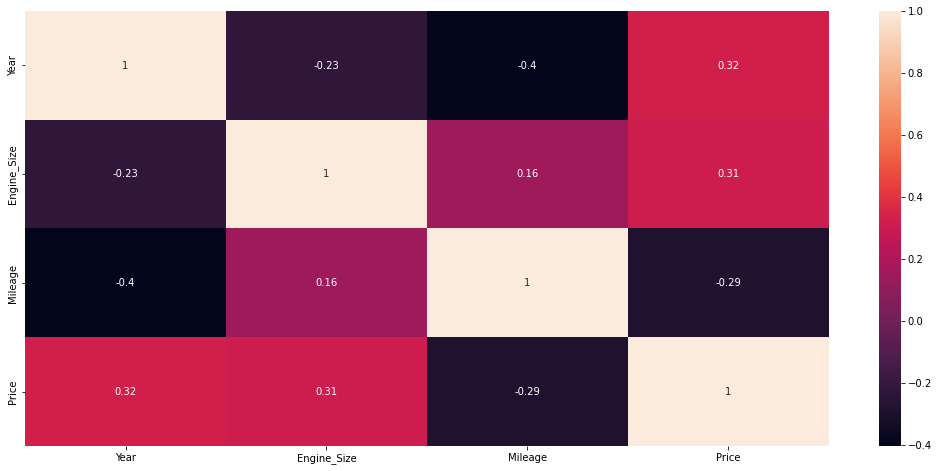

In [29]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.heatmap(cars.corr(),annot=True)
plt.show()

In [30]:
cars.corr()["Price"].sort_values() 

Mileage       -0.285978
Engine_Size    0.306201
Year           0.320826
Price          1.000000
Name: Price, dtype: float64

In [31]:
cars_sig = cars[['Make','Year', 'Color', 'Options','Engine_Size','Gear_Type', 'Mileage', 'Price']]

In [32]:
cars_sig

,Make,Year,Color,Options,Engine_Size,Gear_Type,Mileage,Price
7624,Mercedes,1986,Silver,Full,3.0,Automatic,500000,5500
5565,Other,2021,Yellow,Semi Full,1.2,Manual,3000,5500
1208,Kia,2006,White,Standard,1.3,Manual,290000,6000
5038,Mercury,2001,Blue,Semi Full,4.6,Automatic,33000,6000
2063,Ford,2001,White,Standard,4.6,Automatic,350000,6000
...,...,...,...,...,...,...,...,...
3182,Bentley,2020,Black,Standard,1.0,Automatic,300,772500
4038,Mercedes,2019,Black,Full,4.0,Automatic,39000,800000
3826,Mercedes,2019,Grey,Full,4.0,Automatic,60000,835000
5913,Bentley,2019,Another Color,Full,6.0,Automatic,13000,850000


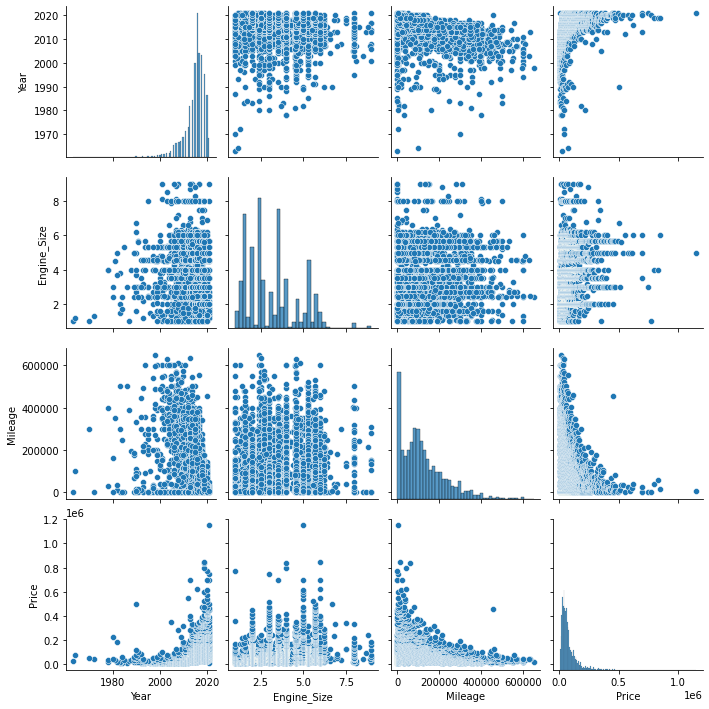

In [33]:
sns.pairplot(cars_sig)
plt.show()

In [34]:
cat_col = ['Color', 'Options', 'Gear_Type', 'Make'] # Categorical Valiables
dummies = pd.get_dummies(cars_sig[cat_col])
dummies.shape

(5376, 77)

In [35]:
cars_sig = pd.concat([cars_sig, dummies], axis = 1)
cars_sig.shape

(5376, 85)

In [36]:
cars_sig.drop(cat_col, axis = 1, inplace = True)
cars_sig.shape

(5376, 81)

In [37]:
cars_sig.head()

,Year,Engine_Size,Mileage,Price,Color_Another Color,Color_Black,Color_Blue,Color_Bronze,Color_Brown,Color_Golden,...,Make_Porsche,Make_Renault,Make_Rolls-Royce,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Victory Auto,Make_Volkswagen,Make_Zhengzhou,Make_Škoda
7624,1986,3.0,500000,5500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,2021,1.2,3000,5500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1208,2006,1.3,290000,6000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5038,2001,4.6,33000,6000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2063,2001,4.6,350000,6000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
from sklearn.model_selection import train_test_split

X = cars_sig.drop(['Price'] , axis=1)
y = cars_sig['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [40]:
model = LinearRegression()

model.fit(X_train, y_train)
preds_lm_test = model.predict(X_test)

In [41]:
print(r2_score(y_test, preds_lm_test))

0.5535689178315858


In [42]:
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor(random_state = 42, criterion = 'mse')
reg_forest.fit(X_train, y_train) 
preds_forest_test = reg_forest.predict(X_test)  

In [43]:
from sklearn.metrics import r2_score
print(r2_score(y_test, preds_forest_test))

0.8000078839122025
